# Price predicition of used card

* STEPS
1. Import libraries
2. Import Dataset
3. Perform Data Analysis & EDA
4. Splitting the data
5. [Optional] Data Preprocessing - Featur Scaling,..
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model


#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Problem Statement

In [ ]:
#target---selling price

#Import the dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#EDA


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.ndim

2

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#no missing data
#latest cars sold in 2020

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#how many unique values are there in fuel, and what are they
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
#how many unique values are there in seller_type, and what are they
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
#how many unique values are there in transmission, and what are they
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
#how many unique values are there in owner, and what are they
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
#Regression model cant take categorical values
#but those features has impact
#so convert them to numerical value

In [ ]:
#CLEAN-1
#create a column new_fuel and place it at index of the fuel column
#Replace the values:
#Petrol-0
#Diesel-1
#CNG-2
#Electric-4

In [ ]:
# #try1 chatgpt
# # Mapping for fuel types
# fuel_mapping = {
#     'Petrol': 0,
#     'Diesel': 1,
#     'CNG': 2,
#     'Electric': 4
# }

# # Create new column 'new_fuel' based on 'fuel' column values
# df['new_fuel'] = df['fuel'].map(fuel_mapping)

# # Reorder columns (place 'new_fuel' at the index of 'fuel')
# new_order = ['name', 'year', 'selling_price', 'km_driven', 'new_fuel','fuel', 'seller_type', 'transmission', 'owner']
# df = df[new_order]

# print(df)

In [ ]:
# #step1
# #dfc=df.copy()
# x=df.fuel.replace({"Petrol":0,'Diesel':1,"CNG":2,"LPG":3,"Electric":4})
# df.insert(4,'new_fuel',x)
# #always we cant write specific index--4, the logic is
# #df.columns.get_loc('fuel') is equivalent to the index 4
# #here after use like this

In [ ]:
# df.head()

In [ ]:
# df.new_fuel.unique()

In [ ]:
#CLEAN-2
#create a column new_seller_type and place it at index of the seller_type column
#Replace the values:
#Individual-0
#Dealer-1
#CTrustmark Deale-2


In [ ]:
# df.seller_type.unique()

In [ ]:
# #step1
# #dfc=df.copy()
# x=df.seller_type.replace({"Individual":0,'Dealer':1,"Trustmark Dealer":2})
# df.insert(df.columns.get_loc('seller_type'),'new_seller_type',x)
# #always we cant write specific index--6, the logic is used
# #

In [ ]:
# df.head()

In [ ]:
# df.new_seller_type.unique()

In [ ]:
# #CLEAN1,2 by Encoders
# newdf=df.copy()

In [ ]:
# newdf=df.fuel

In [ ]:
# newdf.head()

In [ ]:
# type(newdf)

In [ ]:
# #take 2 col from df, make a new df
# newdf=df[['fuel','seller_type']]

In [ ]:
# newdf

* Encoders--Hndle categorical values

In [ ]:
#CLEAN-1, CLEAN-2 by Label Encoders
#Best
from sklearn.preprocessing import LabelEncoder
df['fuel']= LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
#CLEAN-3,
#We nave year feature, --->need to know how old the car is
#Current year- year
#Create a column no_of_years=current year-year
df['no_of_years']=2024- df.year

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,10


In [ ]:
#name, year--->remove new
#name have no impact
#year--> we have changed to no_of_years
df=df.drop(['name','year'], axis=1)

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [ ]:
#rename selling_price to current_selling price
df=df.rename({'selling_price':'current_selling price'},axis=1)

In [ ]:
df.head()

,current_selling price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [ ]:
#correlation
df.corr()

,current_selling price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

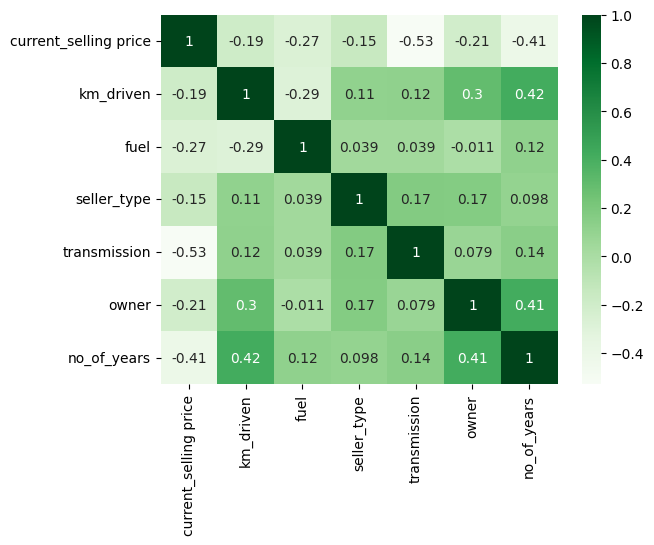

In [ ]:
#correlation in heatmap
sns.heatmap(df.corr(),annot=True, cmap="Greens")

In [ ]:
# insight
# The following has more impact on current_selling_price
# 1. seller_type
# 2. km_driven
# 3. owner
# ..
# ..

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


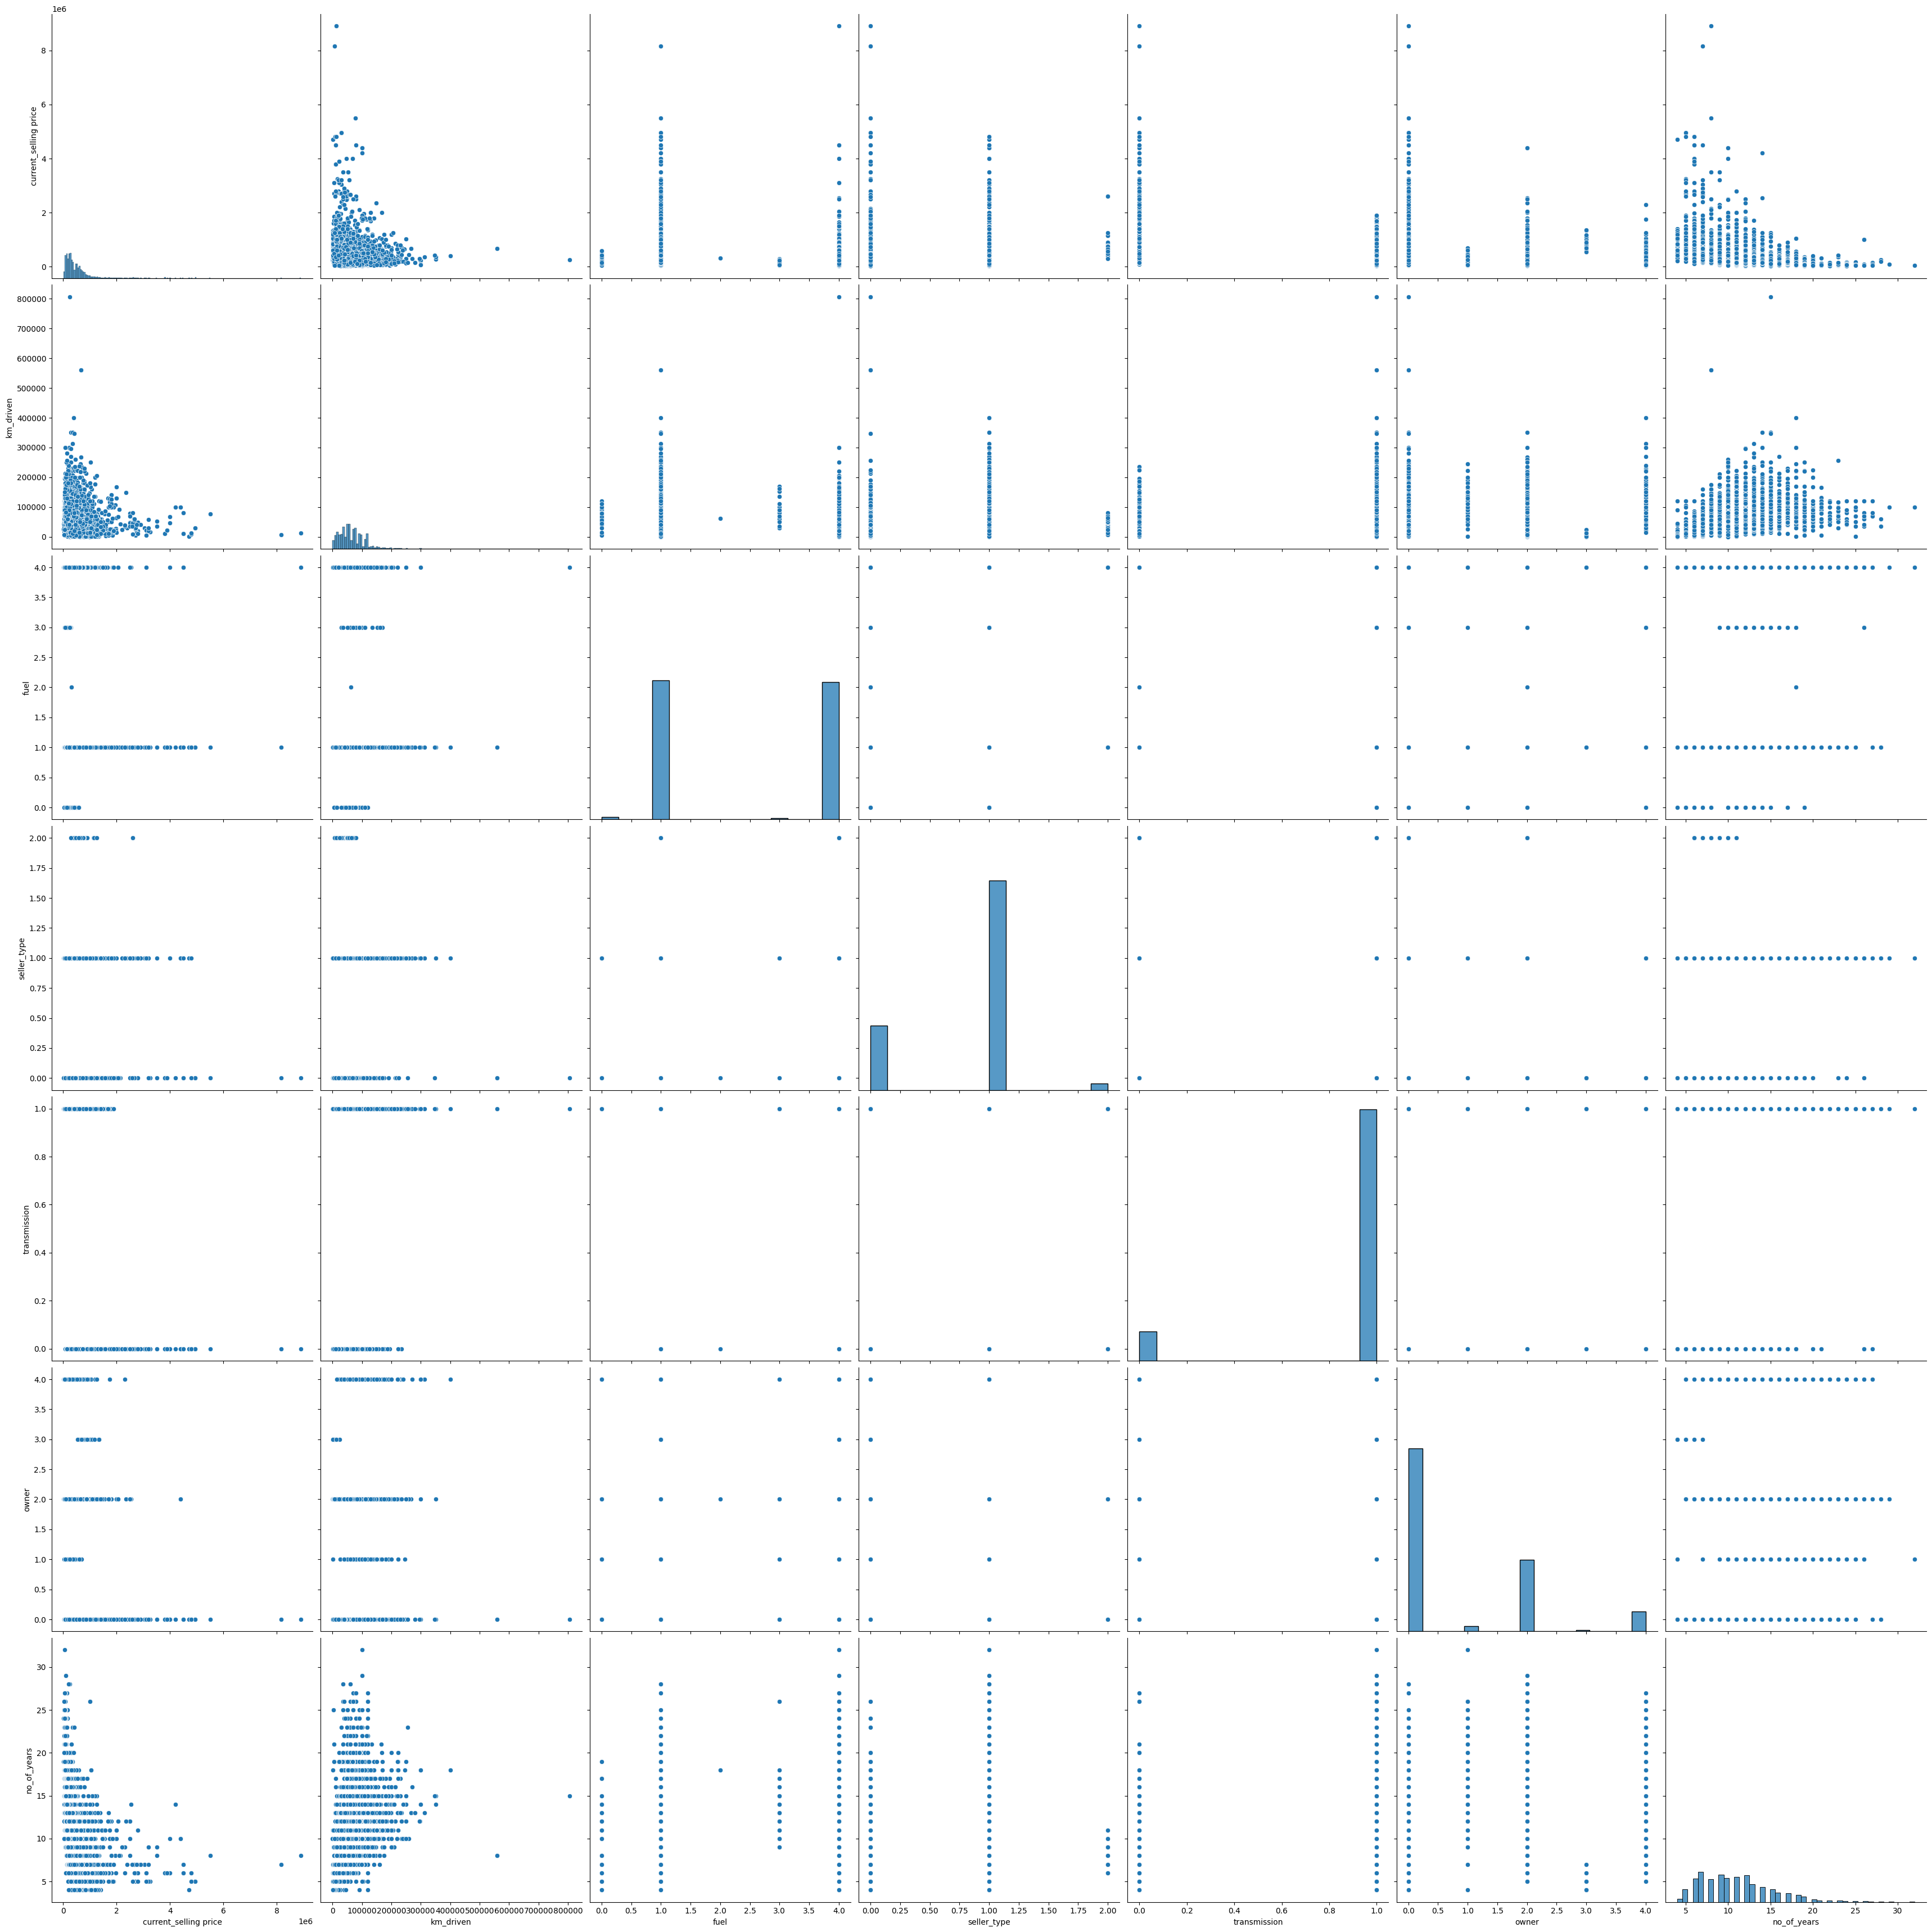

In [ ]:
sns.pairplot(df, size=5)

<Axes: >

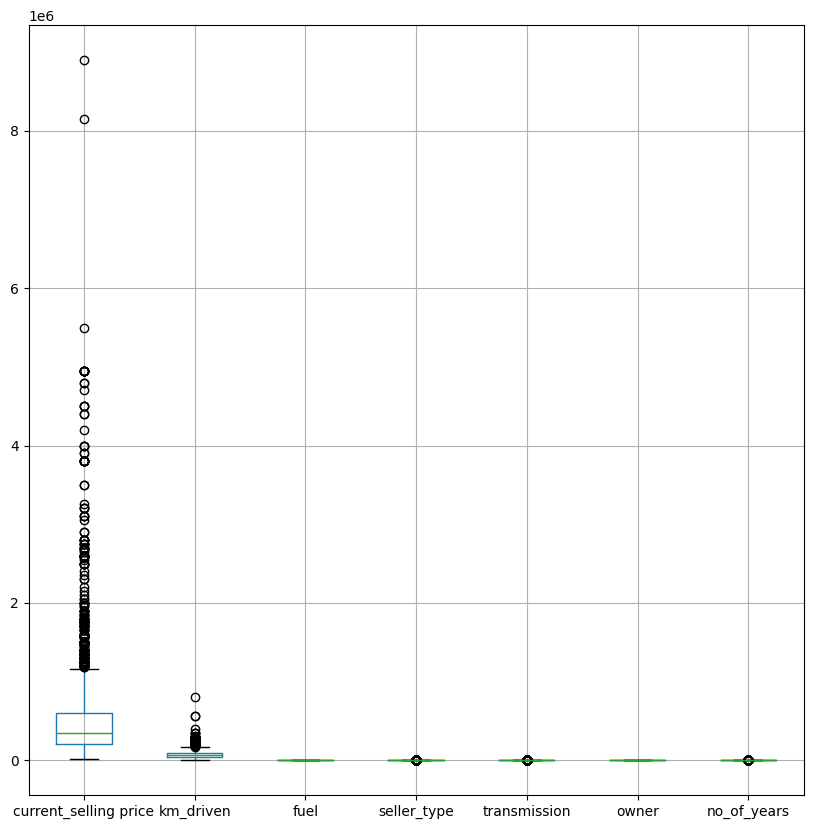

In [ ]:
#check outliers
plt.figure(figsize=(10,10))
df.boxplot()

In [ ]:
#lot of outliers are there

# Select feature and Targets

In [ ]:
X=np.array(df.drop('current_selling price', axis=1))
y=np.array(df['current_selling price'])

In [ ]:
df.head()

,current_selling price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


# Feature Selection by checking with correlation
# Do feature scaling

# Splitting the data

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2)

# Choosing the model

In [ ]:
regressor=DecisionTreeRegressor()

# Train

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# Test

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
target =pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [ ]:
target.head()

,Actual,Predicted
0,120000,130000.000000
1,375000,385000.000000
2,600000,522500.000000
3,450000,527666.666667
4,375000,415000.000000


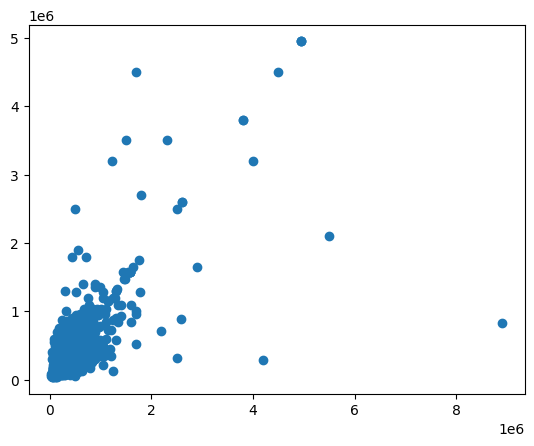

In [ ]:
# see relation b/w actual and predicted values
plt.scatter(y_test,y_pred)


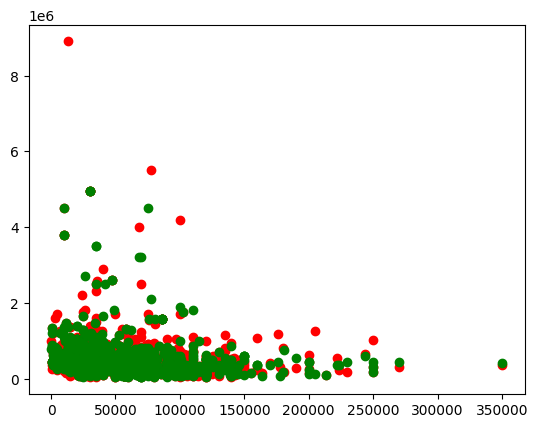

In [ ]:
##Understand this
#do this always
plt.scatter(X_test[:,0],y_test, color="r")
plt.scatter(X_test[:,0],y_pred, color="g")

<Axes: >

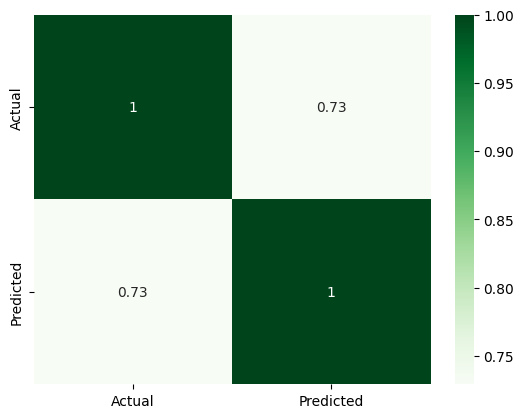

In [ ]:
sns.heatmap(target.corr(), annot=True, cmap="Greens")

In [ ]:
X_test[:,0].shape

(868,)

In [ ]:
y_test.shape

(868,)

#Study the reshape concept and construct a scatter plot that shows the actual and predicted values w.r.to X

# Performance

In [ ]:
r2_score(y_test, y_pred)

0.5143670434375394

In [ ]:
#see DecisionTree documentation, see all parameters, do Hyperparameter training

In [ ]:
# eg
# abcd=[x for i in np.linspace(100,1200,12)]
# param={
#     'ccp_alpha'= abcd
# }
# use this and tune the hyper parameter--->'ccp_alpha'

In [ ]:
#Get better Accuracy